In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('data/train.csv', parse_dates=['datetime'])
test = pd.read_csv('data/test.csv', parse_dates=['datetime'])
sub = pd.read_csv('data/sampleSubmission.csv')

train.shape, test.shape, sub.shape

((10886, 12), (6493, 9), (6493, 2))

In [3]:
f_names = ['temp', 'atemp']
X_tr_all = train[f_names]         # 학습용 데이터의 변수 선택 
last_X_test = test[f_names]       # 테스트 데이터의 변수 선택 
y_tr_all = train['count']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tr_all, 
                                                    y_tr_all,
                                                    test_size=0.3,
                                                    random_state=77)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)
# 정확도 확인
print("학습용 세트 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 결정계수: {:.3f}".format(model.score(X_test, y_test)))

model.predict(X_test)         # 예측(새로운 데이터로)

학습용 세트 결정계수: 0.159
테스트 세트 결정계수: 0.146


array([235.46986679, 151.05560946, 218.26182702, ..., 133.09294136,
       151.05560946,  82.34013525])

### 여러개의 변수를 사용해보기


In [7]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [8]:
f_names = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
X_tr_all = train[f_names]         # 학습용 데이터의 변수 선택 
last_X_test = test[f_names]       # 테스트 데이터의 변수 선택 

y_tr_all = train['count']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tr_all, y_tr_all, test_size=0.3, random_state=77)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.262
테스트 세트 정확도: 0.257


In [11]:
# 2-5 (추가) 7:3, 8:2, 9:1 결정계수 확인해 보기.
from sklearn.model_selection import train_test_split

train_list = []
test_list = []
num_list = []
for i in range(1,6):
    X_train, X_test, y_train, y_test = train_test_split(X_tr_all, y_tr_all, test_size=(i/10), random_state=77)
    model = LinearRegression()
    model.fit(X_train, y_train)
    s1 = model.score(X_train, y_train)
    s2 = model.score(X_test, y_test)
    train_list.append(s1)
    test_list.append(s2)
    num_list.append(f"{10-i}:{i}")
df = pd.DataFrame({'훈련:테스트':num_list,'train_score':train_list, 'test_score':test_list})
df

,훈련:테스트,train_score,test_score
0,9:1,0.262330,0.246045
1,8:2,0.263240,0.249909
2,7:3,0.262026,0.256776
3,6:4,0.267504,0.248669
4,5:5,0.272523,0.247395


In [12]:
###
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [13]:
f_names = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 
           'humidity', 'windspeed']
X_tr_all = train[f_names]         # 학습용 데이터의 변수 선택

In [14]:
scaler = MinMaxScaler().fit(X_tr_all)
nor_X_tr_all = scaler.transform(X_tr_all)
X_test_all = test[f_names]

y_tr_all = train['count']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(nor_X_tr_all, y_tr_all, test_size=0.3, random_state=77)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.262
테스트 세트 정확도: 0.257


In [17]:
from sklearn.linear_model import Lasso, Ridge

In [18]:
model = Lasso()
model.fit(X_train, y_train)
# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.258
테스트 세트 정확도: 0.254


In [19]:
model = Ridge()
model.fit(X_train, y_train)
# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.262
테스트 세트 정확도: 0.257


<AxesSubplot:>

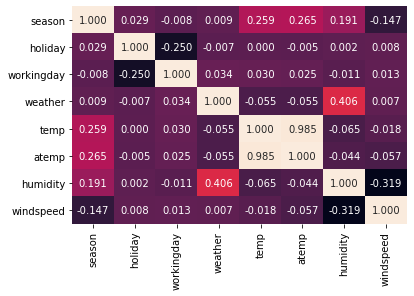

In [20]:
import seaborn as sns
sns.heatmap(X_tr_all.corr(), annot=True, fmt=".3f", cbar=False)

In [21]:
# 상관관계가 높은 특성들은 모델 훈련시 최대한 제외한다.(예. temp, atemp)

In [22]:
print("원래 데이터 : ", X_tr_all.shape)

nor_X = MinMaxScaler().fit_transform(X_tr_all)  # 입력 데이터 정규화
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(nor_X)  # 데이터 feature 추가 생성

print("정규화, 추가 생성 : ", ex_X.shape, y_tr_all.shape)
print(type(X_tr_all), type(ex_X))

원래 데이터 :  (10886, 8)
정규화, 추가 생성 :  (10886, 44) (10886,)
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [23]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, 
                                                    y_tr_all,
                                                    test_size=0.3,
                                                    random_state=77)

In [24]:
model_list = [LinearRegression(), Ridge(), Lasso()]

In [25]:
for model in model_list:
    model.fit(X_train, y_train)
    
    print("모델 : ", model)
    # 정확도 확인
    print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
    print()

모델 :  LinearRegression()
학습용 세트 정확도: 0.307
테스트 세트 정확도: 0.306

모델 :  Ridge()
학습용 세트 정확도: 0.302
테스트 세트 정확도: 0.304

모델 :  Lasso()
학습용 세트 정확도: 0.264
테스트 세트 정확도: 0.260



In [26]:
# 3-2 (추가) knn 모델 추가(knn모델의 결정계수 값은?- 댓글)
from sklearn.neighbors import KNeighborsRegressor
model_list = [KNeighborsRegressor(), LinearRegression(), Ridge(), Lasso()]
for model in model_list:
    model.fit(X_train, y_train)
    
    print("모델 : ", model)
    # 정확도 확인
    print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
    print()

모델 :  KNeighborsRegressor()
학습용 세트 정확도: 0.533
테스트 세트 정확도: 0.302

모델 :  LinearRegression()
학습용 세트 정확도: 0.307
테스트 세트 정확도: 0.306

모델 :  Ridge()
학습용 세트 정확도: 0.302
테스트 세트 정확도: 0.304

모델 :  Lasso()
학습용 세트 정확도: 0.264
테스트 세트 정확도: 0.260



In [27]:
# 최종 모델 확인
model = LinearRegression()
model.fit(X_train, y_train)
scaler = MinMaxScaler().fit(X_tr_all)
nor_X_test_all = scaler.transform(X_test_all)
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(nor_X_test_all)

In [28]:
# kaggle에서 음수값은 오류 발생. 음수를 0으로 만든다.
pred = model.predict(ex_X)
sub['count'] = pred
sub.loc[sub['count']<0, 'count'] = 0

In [29]:
sub.to_csv("pre_sub.csv", index=False)

In [30]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
scaler = MinMaxScaler().fit(X_tr_all)

nor_X_tr_all = scaler.transform(X_tr_all)
ex_X_tr = PolynomialFeatures(degree=1, include_bias=False).fit_transform(nor_X_tr_all)

y_tr_all = train['count']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(ex_X_tr, 
                                                    y_tr_all,
                                                    test_size=0.3,
                                                    random_state=77)

In [32]:
nor_X_test_all = scaler.transform(X_test_all)
ex_X_test = PolynomialFeatures(degree=1, include_bias=False).fit_transform(nor_X_test_all)

In [33]:
# 3-3 (추가) 앙상블 모델 추가.(댓글로 제출 점수 확인)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=4, random_state=0)
rf.fit(X_train, y_train)
pred = rf.predict(ex_X_test)
sub['count'] = pred
sub.loc[sub['count']<0, 'count'] = 0
sub.to_csv('bike3.csv', index=False)